# **MLBA Assignment 4**  
Deadline：2020.12.10 18:30

## **Math Part（50%）**

### **Problem 1（10%）**  
Let $A$ be an $n \times m$ matrix and $B$ be a
$k \times d$ matrix. You want to find the $m \times k$ matrix $X$ so that $J = \|{C-AXB}\|^2_F$ is minimized, where $C$ is a known $n \times d$ matrix. Derive the derivative of $J$ with respect to $X$ and the optimality conditions. Show that one possible solution to the optimality conditions is $X = A^+CB^+$, where $A^+$ and $B^+$ represent the Moore-Penrose pseudo-inverses of $A$ and $B$, respectively.


### **Problem 2（10%）**  
Show that if the dot product of a $d$-dimensional vector $\bar{v}$ with $d$ linearly independent vector is $0$, then $\bar{v}$ must be the zero vector.

### **Problem 3（10%）**
Consider the neural architecture with connections between alternate layers. Suppose that the recurrence equations of this neural network are as follows:  

$$  
\begin{equation}
\begin{aligned}
\bar{h}_1 &= ReLU(W_1\bar{x}) \\
\bar{h}_2 &= ReLU(W_2\bar{x}+W_3\bar{h}_1) \\
y &= W_4\bar{h}_2
\end{aligned}
\end{equation}
$$

Here, $W_1$, $W_2$, $W_3$, and $W_4$ are matrices of appropriate size. Use the vector-centric backpropagation algorithm to derive the expressions for $\frac{\partial y}{\partial \bar{h}_2}$, $\frac{\partial y}{\partial \bar{h}_1}$, and $\frac{\partial y}{\partial \bar{x}}$ in terms of the matrices and activation values in intermediate layers.

### **Problem 4（10%）**  
Consider a neural network in which a vectored node $\bar{v}$ feeds into two distinct vectored nodes $\bar{h}_1$ and $\bar{h}_2$ computing different functions. The functions computed at the nodes are $\bar{h}_1 = ReLU(W_1\bar{v})$ and $\bar{h}_2 = sigmoid(W_2\bar{v})$. We do not know anything about the values of the variables in other parts of the network, but we know that $\bar{h}_1 = [2,-1,3]^T$ and $\bar{h}_2 = [0.2,0.5,0.3]^T$, that are connected to the node $\bar{v} = [2,3,5,1]^T$. Furthermore, the loss gradients are $\frac{\partial L}{\partial \bar{h}_1} = [-2,1,4]^T $ and $\frac{\partial L}{\partial \bar{h}_2} = [1,3,-2]^T $, respectively. Show that the backpropagation loss gradient $\frac{\partial L}{\partial \bar{v}}$ can be computed in terms of $W_1$ and $W_2$ as follows:  
 \\
\begin{equation*}
\frac{\partial L}{\partial \bar{v}} = W_1^T
\begin{bmatrix}
-2 \\
0 \\
4
\end{bmatrix}
+W_2^T
\begin{bmatrix}
0.16 \\
0.75 \\
-0.42
\end{bmatrix}
\end{equation*} \\
What are the sizes of $W_1$, $W_2$, and $\frac{\partial L}{\partial \bar{v}}?$

### **Problem 5（10%）**
Consider a neural network containing an input layer, a hidden layer, and an output layer. The number of outputs is equal to the number of inputs $d$. Each output value corresponds to an input value, and the loss function is the sum of squared difference between the outputs and their corresponding inputs. The number of node $k$ in the hidden layer is much less than $d$. The $d$-dimensional rows of data matrix $D$ are fed one by one to train this neural network. Discuss why this model is identical to that of unconstrained matrix factorization of rank-k. Interpret the weights and the activations in the hidden layer in the context of matrix factorization. You may assume that the matrix $D$ has full column rank. Define weight matrix and data matrix notations as convenient.



## **Programming Part（50%）**  
*To increase computational efficiency, press「執行階段」above and select「變更執行階段類型」, then choose 「GPU」 or 「TPU」.*

### **Problem 1 (30%)**  
In problem 1, we will first construct a basic **CNN** model using Keras and then apply common techniques to improve model performance.  


#### **(1.0) Before Modeling（0%）**

This problem uses a dataset of about 3,700 photos of flowers. The dataset contains 5 sub-directories, one per class:  
>flower_photo/  
>> daisy/  
  dandelion/  
  roses/  
  sunflowers/  
  tulips/  

In [1]:
# (RUN)
# import libaries
import os 
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Download and explore the dataset
import pathlib # 類似 os.path, 將各種檔案/資料夾相關的操作封裝在 Path 等類別之中，讓檔案/資料夾的操作更加物件導向。(https://myapollo.com.tw/zh-tw/python-pathlib/)
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" # 資料集的下載網址
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True) # tf.keras.utils.get_file()：從網上下載資料，存在文件中
data_dir = pathlib.Path(data_dir) 

image_count = len(list(data_dir.glob('*/*.jpg'))) # 查看副檔名為.jpg的有多少個
print(image_count) # 共有3670張圖片

228818944/228813984 [==============================] - 21s 0us/step
3670


In [17]:
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import pydot

In [2]:
# (RUN)
# Load using keras.preprocessing
# Create a dataset
# 這個讀圖片的方法很重要～

batch_size = 32 # 一次讀入32張
img_height = 160 # 調整圖片高度
img_width = 160 # 調整圖片寬度

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir, # data 的路徑
  validation_split=0.2, # validation 的比例
  subset="training", 
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [3]:
# (RUN)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


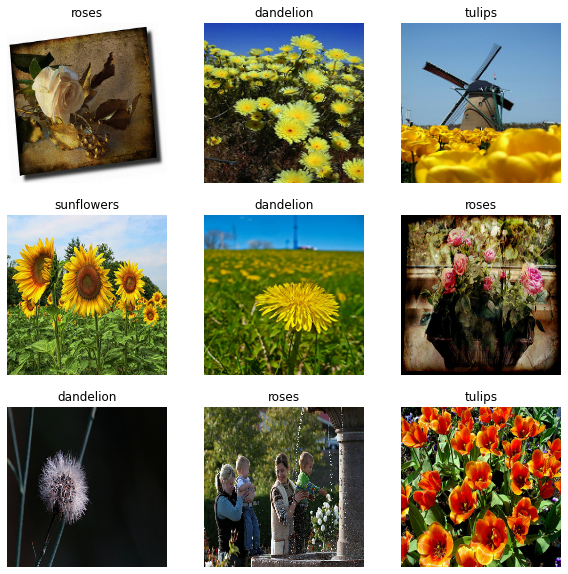

In [4]:
# (RUN)
# visualize the data
import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10, 10)) # 設定圖片大小
for images, labels in train_ds.take(1): # train_ds.take(1) 中有兩項，前項為圖片資料 shape = (32,180,180,3)，後項為標籤資料 shape = (32,)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1) # plt.subplot 用來畫圖組
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
# (RUN)
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **(1.1) Basic CNN (8%)**


##### **(1.1.1) Create the model (4%)**  
Based on the model graph below, please construct a CNN model.  
> Use "relu" as activation function

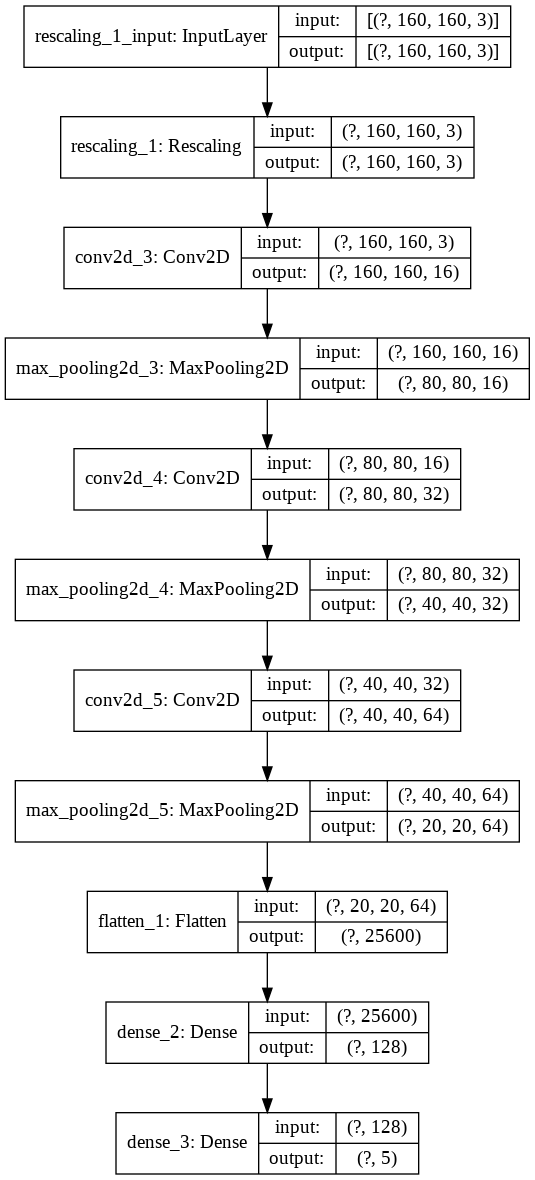

In [21]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(160, 160, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 160, 160, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 64)       

##### **(1.1.2) Complie and train the model (2%)**  
> Use "adam" as optimizer.  
> Use "sparse categorical crossentropy" as loss function.  
> Use "accuracy" as metrics.  
> Train the model for 15 epochs.

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 41s 442ms/step - loss: 1.4384 - accuracy: 0.3873 - val_loss: 1.1369 - val_accuracy: 0.5150
Epoch 2/15
92/92 [==============================] - 36s 388ms/step - loss: 1.0508 - accuracy: 0.5763 - val_loss: 1.0023 - val_accuracy: 0.5967
Epoch 3/15
92/92 [==============================] - 36s 392ms/step - loss: 0.8502 - accuracy: 0.6764 - val_loss: 0.8691 - val_accuracy: 0.6662
Epoch 4/15
92/92 [==============================] - 40s 431ms/step - loss: 0.6845 - accuracy: 0.7418 - val_loss: 0.8707 - val_accuracy: 0.6580
Epoch 5/15
92/92 [==============================] - 37s 408ms/step - loss: 0.5391 - accuracy: 0.8134 - val_loss: 0.9664 - val_accuracy: 0.6621
Epoch 6/15
92/92 [==============================] - 38s 412ms/step - loss: 0.3510 - accuracy: 0.8791 - val_loss: 1.0194 - val_accuracy: 0.6226
Epoch 7/15
92/92 [==============================] - 31s 342ms/step - loss: 0.2348 - accuracy: 0.9230 - val_loss: 1.2615 - val_accuracy: 0.6526

##### **(1.1.3) Visualize training results (2%)**  
> Describe the training results.

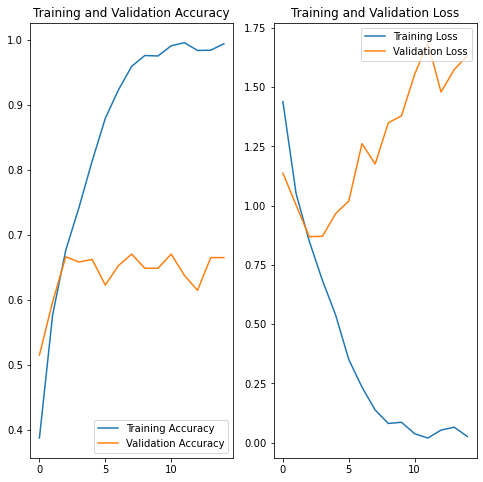

In [24]:
# (RUN)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 60% accuracy on the validation set.

#### **(1.2) Data Augmentation (8%)**  

##### **(1.2.1) Data augmentation layer (2%)**  
Please use the latest keras layer ```layers.experimental.preprocessing``` to construct a sequential model including random flip, random rotation and random zoom. For more detail please visit https://keras.io/guides/preprocessing_layers/


In [25]:
# (RUN)
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

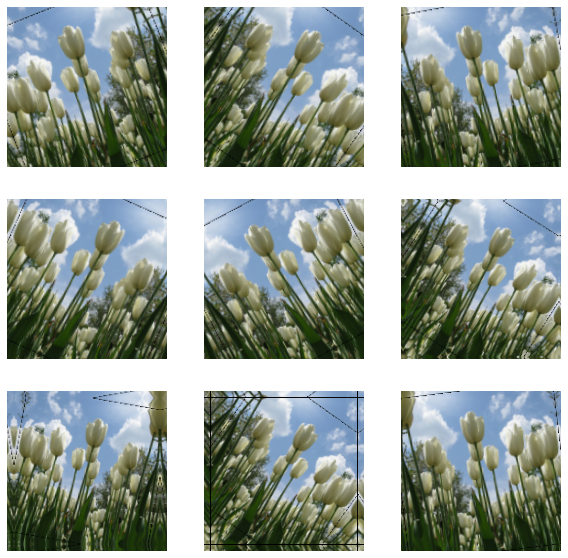

In [26]:
# (Run) visualize augmented examples
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

##### **(1.2.2) Create the model (3%)**  
Add data augmentation layer to the (1.1.1) model.

In [27]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

##### **(1.2.3) Complie and train the model (2%)**  
> Use "adam" as optimizer.  
> Use "sparse categorical crossentropy" as loss function.  
> Use "accuracy" as metrics.  
> Train the model for 15 epochs.

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 42s 459ms/step - loss: 1.2642 - accuracy: 0.4608 - val_loss: 1.2188 - val_accuracy: 0.4973
Epoch 2/15
92/92 [==============================] - 39s 428ms/step - loss: 1.0149 - accuracy: 0.5947 - val_loss: 1.0298 - val_accuracy: 0.5708
Epoch 3/15
92/92 [==============================] - 40s 435ms/step - loss: 0.9101 - accuracy: 0.6478 - val_loss: 0.9917 - val_accuracy: 0.6158
Epoch 4/15
92/92 [==============================] - 42s 457ms/step - loss: 0.8422 - accuracy: 0.6775 - val_loss: 0.8897 - val_accuracy: 0.6485
Epoch 5/15
92/92 [==============================] - 39s 424ms/step - loss: 0.7849 - accuracy: 0.6972 - val_loss: 0.8738 - val_accuracy: 0.6485
Epoch 6/15
92/92 [==============================] - 40s 430ms/step - loss: 0.7426 - accuracy: 0.7129 - val_loss: 0.7871 - val_accuracy: 0.6894
Epoch 7/15
92/92 [==============================] - 42s 455ms/step - loss: 0.7017 - accuracy: 0.7299 - val_loss: 0.7387 - val_accuracy: 0.6989

##### **(1.2.4) Visualize training results (1%)**  
Describe the training results after data augmentation.

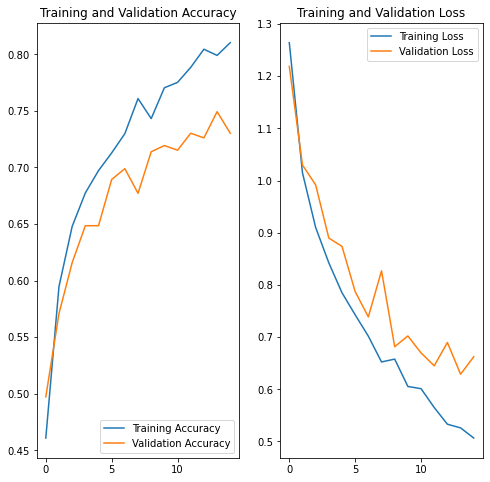

In [29]:
# (RUN)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After applying data augmentation and Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned.

#### **(1.3) Feature Extraction (7%)**

In [35]:
# (RUN)
# Create the base model from the pre-trained model MobileNet V2
img_shape = (img_height, img_width) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


##### **(1.3.1) Import pre-train model (2%)**  
Set the ```base_model``` to be untrainable.

In [36]:
base_model.trainable = False

##### **(1.3.2) Create the model(2%)**  
Complete the model based on the follwing graph.  
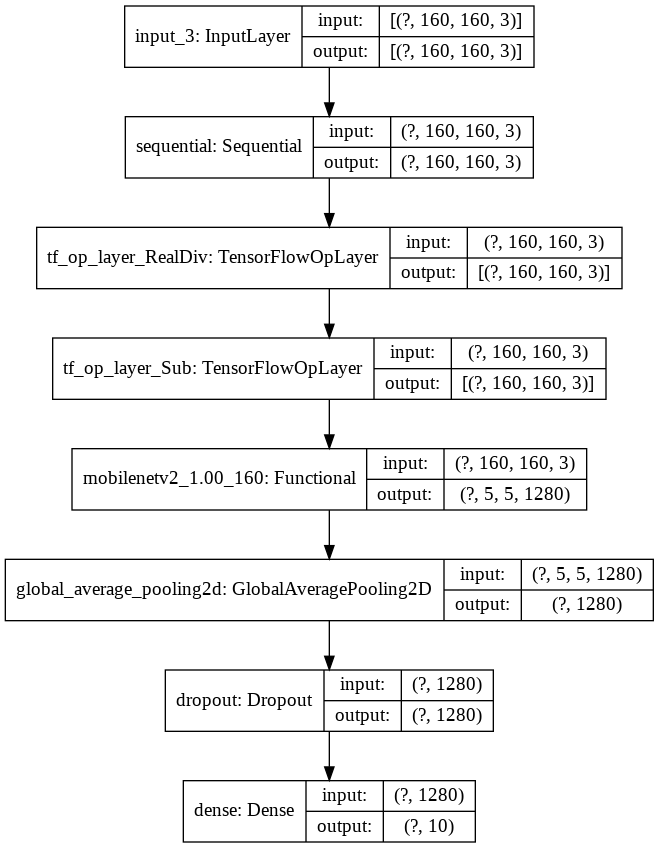

In [51]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(10)

In [52]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

##### **(1.3.3) Compile and train the model (2%)**  
> Use "adam" as optimizer.  
> Use "sparse categorical crossentropy" as loss function.  
> Use "accuracy" as metrics.  
> Train the model for 15 epochs.


In [53]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv_11 (Tens [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub_11 (TensorFl [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_8 ( (None, 1280)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)             

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 51s 552ms/step - loss: 0.9559 - accuracy: 0.6478 - val_loss: 0.5061 - val_accuracy: 0.8188
Epoch 2/15
92/92 [==============================] - 49s 536ms/step - loss: 0.5254 - accuracy: 0.8025 - val_loss: 0.4061 - val_accuracy: 0.8638
Epoch 3/15
92/92 [==============================] - 51s 560ms/step - loss: 0.4276 - accuracy: 0.8413 - val_loss: 0.3794 - val_accuracy: 0.8733
Epoch 4/15
92/92 [==============================] - 52s 567ms/step - loss: 0.3941 - accuracy: 0.8573 - val_loss: 0.3657 - val_accuracy: 0.8624
Epoch 5/15
92/92 [==============================] - 54s 590ms/step - loss: 0.3636 - accuracy: 0.8747 - val_loss: 0.3781 - val_accuracy: 0.8515
Epoch 6/15
92/92 [==============================] - 54s 585ms/step - loss: 0.3295 - accuracy: 0.8794 - val_loss: 0.3522 - val_accuracy: 0.8760
Epoch 7/15
92/92 [==============================] - 48s 520ms/step - loss: 0.3159 - accuracy: 0.8876 - val_loss: 0.3402 - val_accuracy: 0.8842

##### **(1.3.4) Visualize the training results (1%)**  
Run the code cell below and compare the training results to that of (1.2.4).

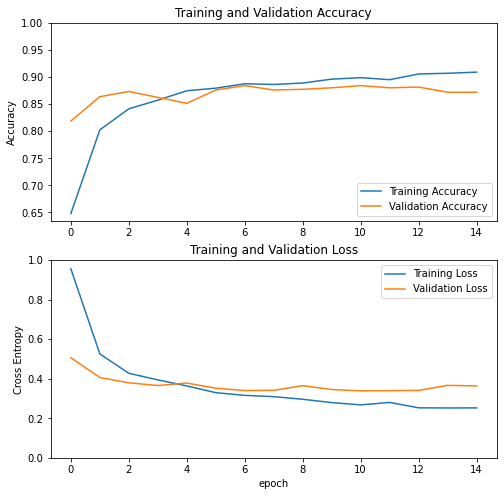

In [57]:
# (RUN)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

compare to the training results to that of (1.2.4), the model's performance is better.

#### **(1.4) Fine-tuning (7%)**

##### **(1.4.1) Set the model trainable (2%)**

In [58]:
base_model.trainable = True

Run the code cell below.

In [59]:
# (RUN)
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
      layer.trainable =  False

Number of layers in the base model:  155


##### **(1.4.2) Compile and train the model (3%)**
> Use "adam" as optimizer.  
> Set learing rate to 0.00001.  
> Use "sparse categorical crossentropy" as loss function.  
> Use "accuracy" as metrics.  
> Train the model for 30 epochs.  

In [61]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

fine_tune_epochs = 15
total_epochs =  initial_epochs + fine_tune_epochs


history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds,)

Epoch 15/30
92/92 [==============================] - 76s 822ms/step - loss: 0.2352 - accuracy: 0.9074 - val_loss: 0.3445 - val_accuracy: 0.8896
Epoch 16/30
92/92 [==============================] - 66s 723ms/step - loss: 0.2023 - accuracy: 0.9268 - val_loss: 0.3139 - val_accuracy: 0.8965
Epoch 17/30
92/92 [==============================] - 68s 737ms/step - loss: 0.1941 - accuracy: 0.9349 - val_loss: 0.3154 - val_accuracy: 0.8937
Epoch 18/30
92/92 [==============================] - 67s 731ms/step - loss: 0.1673 - accuracy: 0.9404 - val_loss: 0.3069 - val_accuracy: 0.9060
Epoch 19/30
92/92 [==============================] - 71s 777ms/step - loss: 0.1561 - accuracy: 0.9387 - val_loss: 0.2861 - val_accuracy: 0.9074
Epoch 20/30
92/92 [==============================] - 72s 787ms/step - loss: 0.1439 - accuracy: 0.9465 - val_loss: 0.3022 - val_accuracy: 0.8951
Epoch 21/30
92/92 [==============================] - 71s 775ms/step - loss: 0.1423 - accuracy: 0.9469 - val_loss: 0.2912 - val_accuracy:

##### **(1.4.3) Visualize the training results (2%)**  
Describe the training results.

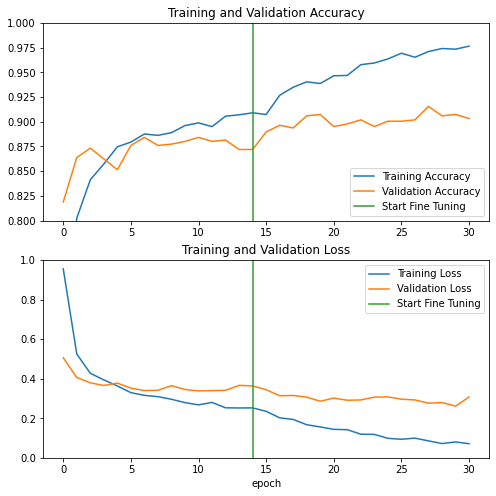

In [62]:
# (RUN)
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Let's take a look at the learning curves of the training and validation accuracy/loss when fine-tuning the last few layers of the MobileNet V2 base model and training the classifier on top of it. The validation loss is much higher than the training loss, so I may get some overfitting.

I may also get some overfitting as the new training set is relatively small and similar to the original MobileNet V2 datasets.

After fine tuning the model nearly reaches 90% accuracy on the validation set.

##### **Results!**

Predictions:
 [0 4 3 0 3 4 1 2 4 0 0 0 4 4 4 3 3 0 0 3 1 4 4 2 0 3 1 2 1 2 3 1]
Labels:
 [0 4 3 0 3 4 1 2 4 0 0 0 4 4 4 3 3 0 0 3 1 4 4 2 3 3 1 2 1 2 4 1]


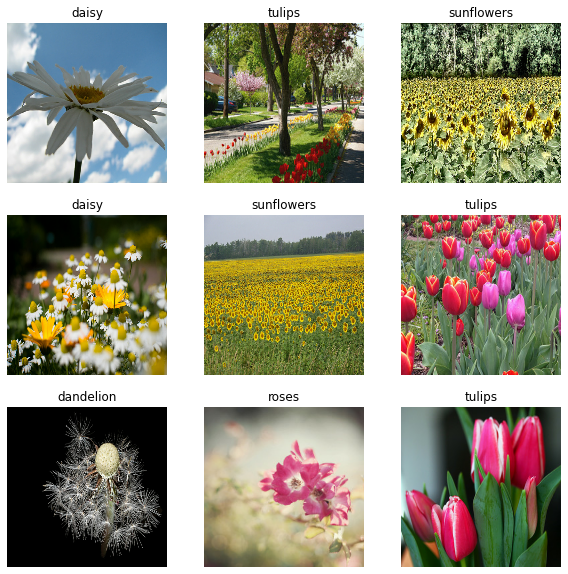

In [63]:
# (RUN)
#Retrieve a batch of images from the test set
image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).reshape(32,10)

# Apply a sigmoid since our model returns logits
predictions = np.argmax(predictions,axis=1)

print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

### **Problem 2 (20%)**  
In problem 2, we will build 2 **Autoencoder** models and 1 **Variational Autoencoder** model to cover the 2 main concepts of AE : data reconsruction and image denoising and see the difference between AE and VAE. 

#### **(2.0) Before Modeling (0%)**

In [64]:
# (RUN)
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential

In [65]:
# (RUN)
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


#### **(2.1) Data Reconstuction（10%）**


##### **(2.1.1) Encoder (3%)**  
Construct a encoder with following structure:  
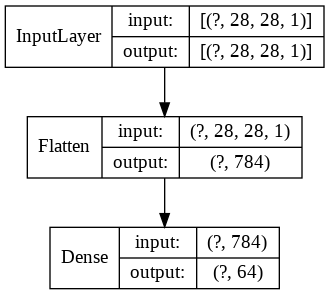



In [66]:
inputs = tf.keras.Input(shape=(28,28,1))
x = layers.Flatten()(inputs)
outputs = layers.Dense(64, activation="relu")(x)
encoder = tf.keras.Model(inputs, outputs)

##### (2.1.2) Decoder (3%)  
Construct a decoder with follow structure:  

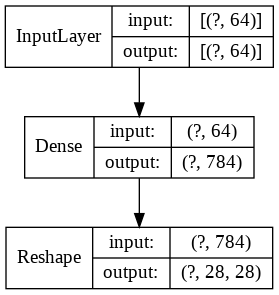

In [67]:
inputs = tf.keras.Input(shape=64)
x = layers.Dense(784, activation="sigmoid")(inputs)
outputs = layers.Reshape((28,28))(x)
decoder = tf.keras.Model(inputs, outputs)

##### **(2.1.3) Autoencoder (2%)**
Connect encoder and decoder to bulid an autoencoder.

In [68]:
autoencoder = Sequential([encoder,decoder])

##### **(2.1.4) Compile and train (2%)**  
> Use adam as optimizer.  
> Use mean squared error as loss function.  
> Train the model for 10 epochs.

In [69]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0237 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.008

##### **Results!**

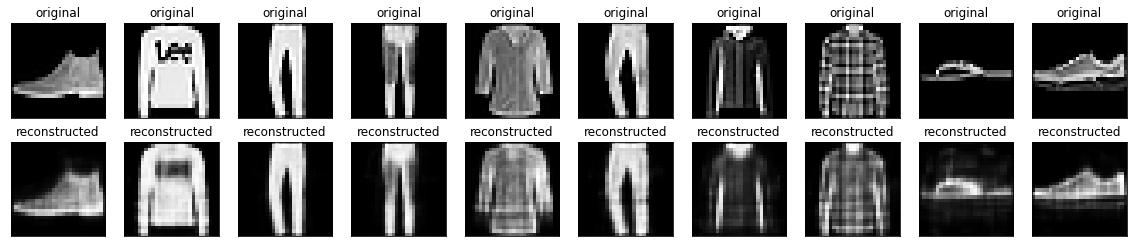

In [70]:
# (RUN)
encoded_imgs = encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### **(2.2) Image Denoising (10%)**

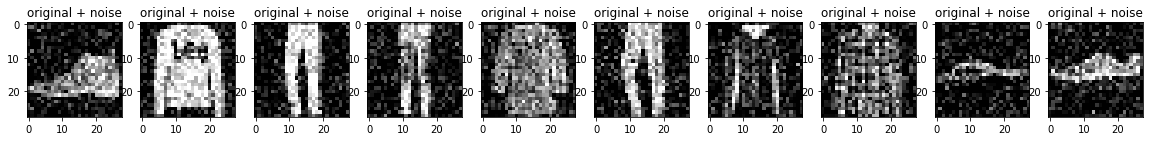

In [71]:
# (RUN)
x_train = x_train[..., tf.newaxis] # 增加一個新的維度
x_test = x_test[..., tf.newaxis] # 增加一個新的維度

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) # 加入雜訊
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) # 加入雜訊

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) # 限制雜訊範圍
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.) # 限制雜訊範圍


n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

##### **(2.2.1) Conv encoder(3%)**  
Construct a Conv encoder with the following structure:  
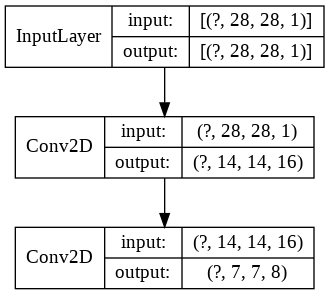

In [72]:
encoder =  tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])


##### **(2.2.2) Conv decoder** (3%)  
Construct a Conv decoder with the following structure:  
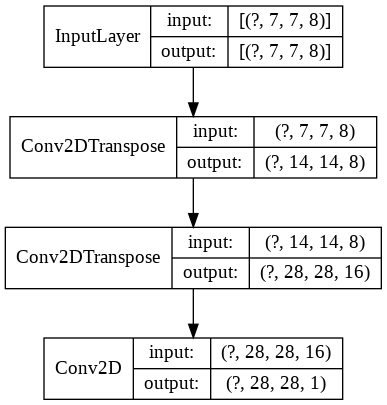

In [73]:
decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

##### **(2.2.3) Conv autoencoder (2%)**  
Connect the encoder and the decoder to built a Conv autoencoder and name it ```Denoise```.

In [74]:
Denoise = Sequential([encoder,decoder])

##### (2.2.4) **Compile and train (2%)**  
> Use adam as optimizer.  
> Use mean squared error as loss function.  
> Train the model for 10 epochs.

In [75]:
Denoise.compile(optimizer='adam', loss=losses.MeanSquaredError())

Denoise.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0183 - val_loss: 0.0110
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 9/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 10/10
1875/1875 [==============================] - 35s 18m

##### **Results!**

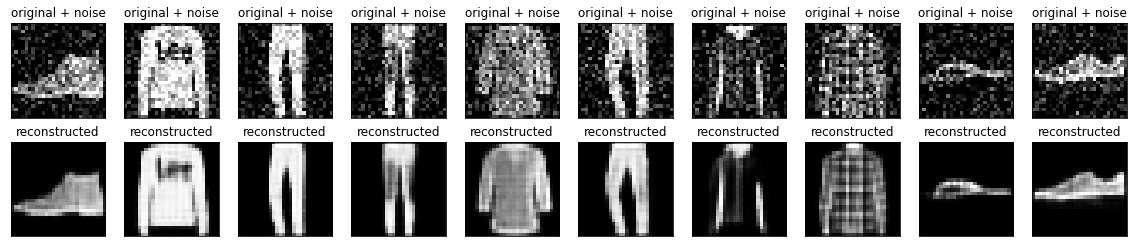

In [76]:
# (RUN)
encoded_imgs = encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### **Reference**
* Tensorflow tutorials (https://www.tensorflow.org/tutorials)  
* Keras code example（https://keras.io/examples/）
* Problem 1 
> https://www.tensorflow.org/tutorials/images/classification  
> https://www.tensorflow.org/tutorials/images/transfer_learning）
* Problem 2 
> https://www.tensorflow.org/tutorials/generative/autoencoder

There are many great examples on these websites, check it if you are interested.
